<a href="https://colab.research.google.com/github/yeseul106/Cow_Contest/blob/main/LSTM_cow_contest_Predicting_wholesale_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**도매 가격 예측부터 !**

30일 간 데이터를 이용하여 향후 한달 가격 예측 <br>

input shape : 16 X 30 <br>

output shape : 1 X 30






In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

'''''''''''''''read csv file'''''''''''''''
trainData = pd.read_csv('/content/drive/MyDrive/cow_contest/preprocessed_unNormalized_2015_2019.csv', encoding='cp949')
testData =  pd.read_csv('/content/drive/MyDrive/cow_contest/preprocessed_unNormalized_2020.csv', encoding='cp949')
print("2015_2019 데이터 shape :",trainData.shape)
print("2020 데이터 shape :",testData.shape)
trainData.head(5)  # 정규화까지 processing한 상태

2015_2019 데이터 shape : (1235, 16)
2020 데이터 shape : (251, 16)


,날짜,가임암소 수,도축 수,암송아지가격,숫송아지가격,소비자 심리지수,물가 총지수,물가 농축수산물지수,도체 중량,생산량,출생두수,사육비,도매 가격,소비자 가격,당해 도매 가격,당해 소비자 가격
0,20150102,571347,96045,839.000000,1370.0,102.0,99.77,99.74,413.051366,267,50325,6867510,17343,78497,14255,64390
1,20150105,571347,96045,839.333333,1430.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18445,78548,14158,65654
2,20150106,571347,96045,839.666667,1490.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18813,78738,14758,65397
3,20150107,571347,96045,840.000000,1550.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18905,76974,14838,65539
4,20150108,571347,96045,852.000000,1555.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18950,76924,14859,62858


In [ ]:
'''''''''''''''seperate x and y data'''''''''''''''
# 일단 지금은 한달 가격 예측이므로 1년 뒤 도매 가격 제거
trainData = trainData.drop(columns=['도매 가격'])

In [ ]:
trainData.head(5)

,날짜,가임암소 수,도축 수,암송아지가격,숫송아지가격,소비자 심리지수,물가 총지수,물가 농축수산물지수,도체 중량,생산량,출생두수,사육비,소비자 가격,당해 도매 가격,당해 소비자 가격
0,20150102,571347,96045,839.000000,1370.0,102.0,99.77,99.74,413.051366,267,50325,6867510,78497,14255,64390
1,20150105,571347,96045,839.333333,1430.0,102.0,99.77,99.74,413.051366,267,50325,6867510,78548,14158,65654
2,20150106,571347,96045,839.666667,1490.0,102.0,99.77,99.74,413.051366,267,50325,6867510,78738,14758,65397
3,20150107,571347,96045,840.000000,1550.0,102.0,99.77,99.74,413.051366,267,50325,6867510,76974,14838,65539
4,20150108,571347,96045,852.000000,1555.0,102.0,99.77,99.74,413.051366,267,50325,6867510,76924,14859,62858


In [ ]:
# 도매 가격만 먼저 예측해보기 위함이므로 소비자 가격, 당해 소비자 가격 제거
trainData = trainData.drop(columns=['소비자 가격', '당해 소비자 가격','날짜'])
trainData.head(5)

,가임암소 수,도축 수,암송아지가격,숫송아지가격,소비자 심리지수,물가 총지수,물가 농축수산물지수,도체 중량,생산량,출생두수,사육비,당해 도매 가격
0,571347,96045,839.000000,1370.0,102.0,99.77,99.74,413.051366,267,50325,6867510,14255
1,571347,96045,839.333333,1430.0,102.0,99.77,99.74,413.051366,267,50325,6867510,14158
2,571347,96045,839.666667,1490.0,102.0,99.77,99.74,413.051366,267,50325,6867510,14758
3,571347,96045,840.000000,1550.0,102.0,99.77,99.74,413.051366,267,50325,6867510,14838
4,571347,96045,852.000000,1555.0,102.0,99.77,99.74,413.051366,267,50325,6867510,14859


In [ ]:
# 정규화 0-1로 하기
data_normalizer = preprocessing.MinMaxScaler() # 데이터를 0~1 범위로 점철되게 하는 함수 call
data_normalized = data_normalizer.fit_transform(trainData) # 데이터를 0~1 범위로 점철되게 함수 수행
next_month_price = data_normalized[:,-1]
data_normalized.shape

(1235, 12)

In [ ]:
data_normalized[0]

array([0.        , 0.90674595, 0.        , 0.        , 0.46524064,
       0.01010101, 0.10323959, 0.56561515, 1.        , 0.10628024,
       0.        , 0.33008475])

In [ ]:
print(next_month_price.shape)
next_month_price[0]

(1235,)


0.33008474576271185

In [ ]:
# using the last {history_points} open close high low volume data points, predict the next open value
history_points = 30  # 30일을 기준으로 바라본다
trainData_normalized = np.array([data_normalized[i:i + history_points].copy() for i in range(len(data_normalized) - history_points)]) # trainData를 가지고 오되, 관찰일수 만큼 누적해서 쌓는다. (열방향으로)
print('trainData_normalized : ', trainData_normalized.shape)

trainData_normalized :  (1205, 30, 12)


In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [ ]:
next_month_price_normalized = np.array([next_month_price[i:i + history_points].copy() for i in range(len(next_month_price) - history_points)])
next_month_price_normalized = np.expand_dims(next_month_price_normalized, -1) # 1XN 벡터 -> NX1 벡터로
print('next_month_price_normalized shape: ', next_month_price_normalized.shape)

next_month_price_unNormalized = trainData['당해 도매 가격']
print('next_month_price_unNormalized shape: ', next_month_price_unNormalized.shape)

y_normalizer = preprocessing.MinMaxScaler()
next_month_price_unNormalized_2 = np.expand_dims(next_month_price_unNormalized, -1) # 1XN 벡터 -> NX1 벡터로
y_normalizer.fit(next_month_price_unNormalized_2)

next_month_price_unNormalized = np.array([next_month_price_unNormalized[i:i + history_points].copy() for i in range(len(next_month_price_unNormalized) - history_points)])
next_month_price_unNormalized = np.expand_dims(next_month_price_unNormalized, -1) # 1XN 벡터 -> NX1 벡터로
print('next_month_price_unNormalized shape: ', next_month_price_unNormalized.shape)

next_month_price_normalized shape:  (1205, 30, 1)
next_month_price_unNormalized shape:  (1235,)
next_month_price_unNormalized shape:  (1205, 30, 1)


In [ ]:
next_month_price_unNormalized[0]

array([[14255],
       [14158],
       [14758],
       [14838],
       [14859],
       [14644],
       [14367],
       [14565],
       [14412],
       [14180],
       [13961],
       [13525],
       [13861],
       [13866],
       [13721],
       [13590],
       [13185],
       [13561],
       [13608],
       [13547],
       [13385],
       [13285],
       [13650],
       [14076],
       [14347],
       [14415],
       [14374],
       [14789],
       [14937],
       [14761]])

In [ ]:
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation
from keras import optimizers
import numpy as np
np.random.seed(4)
# from tensorflow import set_random_seed
print(tf.__version__)
tf.random.set_seed(44)
# from util import csv_to_dataset, history_points

# dataset

#ohlcv_histories, _, next_day_open_values, unscaled_y, y_normaliser = call_dataset(ticker=ticker)

train_ratio = 0.9
n = int(trainData_normalized.shape[0] * train_ratio)

trainData = trainData_normalized[-n:-1]
y_train_real = next_month_price_unNormalized[-n:-1]
y_train = next_month_price_normalized[-n:-1]

validData = trainData_normalized[:trainData_normalized.shape[0]-n]
y_valid_real = next_month_price_unNormalized[:trainData_normalized.shape[0]-n]
y_valid = next_month_price_normalized[:trainData_normalized.shape[0]-n]

unscaled_y_valid = next_month_price_unNormalized[:trainData_normalized.shape[0]-n]

print('trainData.shape: ', trainData.shape)
print('validData.shape: ',validData.shape)
print('y_train_real.shape: ',y_train_real.shape)
print('y_train.shape: ', y_train.shape)
print('y_valid.shape: ',y_valid.shape)

2.6.0
trainData.shape:  (1083, 30, 12)
validData.shape:  (121, 30, 12)
y_train_real.shape:  (1083, 30, 1)
y_train.shape:  (1083, 30, 1)
y_valid.shape:  (121, 30, 1)


In [ ]:
# model architecture
lstm_input = Input(shape=(history_points, 12), name='lstm_input')
x = LSTM(30, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
# x = Dense(128, name='dense_0')(x)
# x = Dropout(0.3, name='lstm_dropout_1')(x)
x = Dense(64, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(30, name='dense_1')(x)
output = Activation('linear', name='linear_output')(x)

model = Model(inputs=lstm_input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(0.0005), loss='mse')
model.fit(x=trainData, y=y_train, batch_size=32, epochs=100)
# evaluation

y_valid_predicted = model.predict(validData)
y_valid_predicted = y_normalizer.inverse_transform(y_valid_predicted)
y_predicted = model.predict(trainData)
y_predicted = y_normalizer.inverse_transform(y_predicted)

print('y_valid_predict shape: ', y_valid_predicted.shape)
print('y_predicted  shape: ', y_predicted .shape)

# unscaled_y_valid = unscaled_y_valid.reshape(*unscaled_y_valid.shape[:-1])
# y_valid = y_valid.reshape(*y_valid.shape[:-1])
# print('unscaled_y_valid  shape: ', unscaled_y_valid .shape)
# print('y_valid  shape: ', y_valid .shape)

# 한달 뒤의 가격 예측인데 ... 어떻게 계산해야할까나?....
# real_mse = np.mean(np.square(unscaled_y_valid - y_valid_predicted))
# scaled_mse = real_mse / (np.max(unscaled_y_valid) - np.min(unscaled_y_valid)) * 100
# print(scaled_mse)

Epoch 1/100
34/34 [==============================] - 2s 11ms/step - loss: 0.4512
Epoch 2/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0917
Epoch 3/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0222
Epoch 4/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0177
Epoch 5/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0173
Epoch 6/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0168
Epoch 7/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0165
Epoch 8/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0163
Epoch 9/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0158
Epoch 10/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0154
Epoch 11/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0154
Epoch 12/100
34/34 [==============================] - 0s 11ms/step - loss: 0.0150
Epoch 13/100
34/34 [=====

In [ ]:
y_valid.min()

0.0

In [ ]:
y_valid_predicted.min()

15348.064

In [ ]:
# # 1년치 데이터를 그래프로 그리기 위해 flatten
y_valid_real = y_valid_real.flatten()
y_valid_predicted = y_valid_predicted.flatten()

print(y_valid_real.shape[0] // 30)

draw_real_valid = []
draw_pred_valid = []

# # 30일 단위로 예측을 했으므로 30일 간격을 가진 채로 이어붙이기
idx = 0
while idx < y_valid_real.shape[0]:
  draw_real_valid.append(y_valid_real[idx])
  draw_pred_valid.append(y_valid_predicted[idx])
  idx += 30

# draw_real_valid[0:60]


121


In [ ]:
# # 1년치 데이터를 그래프로 그리기 위해 flatten
y_train_real = y_train_real.flatten()
y_predicted = y_predicted.flatten()

print(y_train_real.shape[0] // 30)

draw_real = []
draw_pred = []

# # 30일 단위로 예측을 했으므로 30일 간격을 가진 채로 이어붙이기
idx = 0
while idx < y_train_real.shape[0]:
  draw_real.append(y_train_real[idx])
  draw_pred.append(y_predicted[idx])
  idx += 30

# draw_real_valid[0:60]

1083


In [ ]:
print(len(draw_pred))

1083


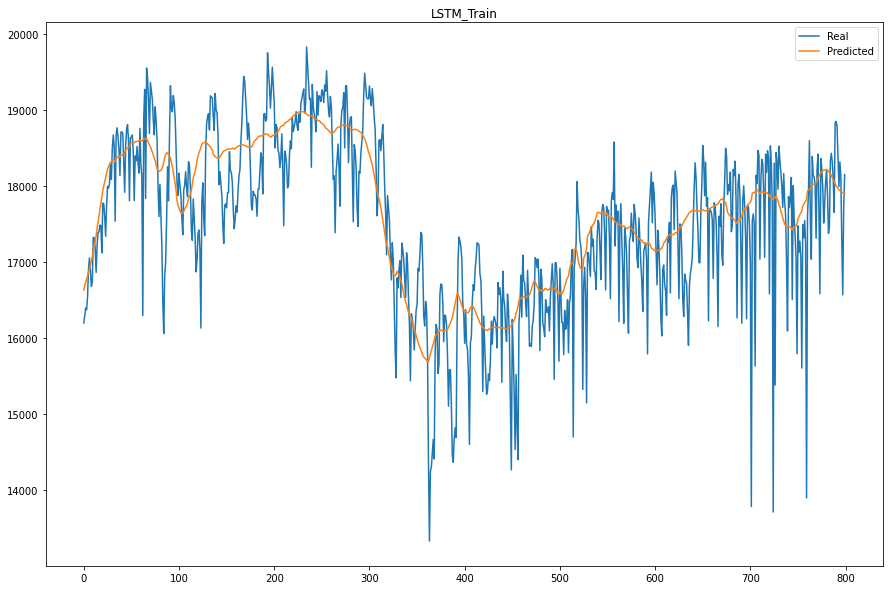

In [ ]:
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 10, forward=True)

start = 0
end = -1

real = plt.plot(draw_real[start:800], label='real')
pred = plt.plot(draw_pred[start:800], label='predicted')

plt.legend(['Real', 'Predicted'])
plt.title('LSTM_Train')
plt.show()

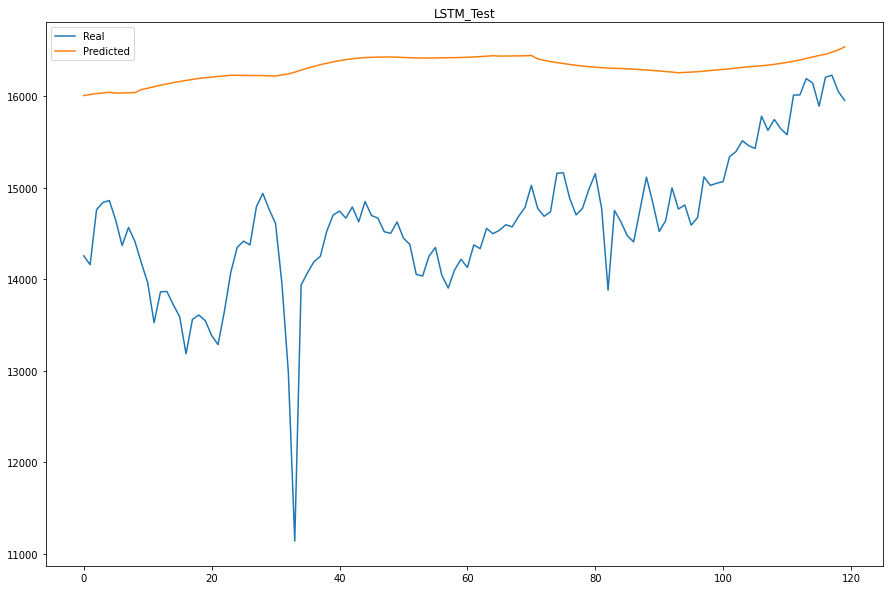

In [ ]:
# 1년치 데이터를 그래프로 그리기 위해 flatten
# draw_real_valid = y_valid_real.flatten()
# draw_pred_valid = y_valid_predicted.flatten()

import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 10, forward=True)

start = 0
end = -1

real = plt.plot(draw_real_valid[start:120], label='real')
pred = plt.plot(draw_pred_valid[start:120], label='predicted')

plt.legend(['Real', 'Predicted'])
plt.title('LSTM_Valid')
plt.show()

In [ ]:
# real data
draw_real[1]

16288

In [ ]:
# predict data
draw_pred[0]

16629.191

In [ ]:
print('-------------Train-------------')
for i in range(30):
  print('실제 가격 : ' , draw_real[i], end="")
  print(' / 예측 가격 : ', draw_pred[i])

-------------Train-------------
실제 가격 :  16197 / 예측 가격 :  16629.191
실제 가격 :  16288 / 예측 가격 :  16684.938
실제 가격 :  16394 / 예측 가격 :  16726.578
실제 가격 :  16369 / 예측 가격 :  16770.137
실제 가격 :  16539 / 예측 가격 :  16814.066
실제 가격 :  16905 / 예측 가격 :  16865.092
실제 가격 :  17051 / 예측 가격 :  16910.176
실제 가격 :  16882 / 예측 가격 :  16953.604
실제 가격 :  16677 / 예측 가격 :  17007.332
실제 가격 :  16730 / 예측 가격 :  17077.838
실제 가격 :  17322 / 예측 가격 :  17156.324
실제 가격 :  17315 / 예측 가격 :  17212.904
실제 가격 :  17183 / 예측 가격 :  17273.88
실제 가격 :  16861 / 예측 가격 :  17344.42
실제 가격 :  17216 / 예측 가격 :  17437.805
실제 가격 :  17386 / 예측 가격 :  17516.443
실제 가격 :  17393 / 예측 가격 :  17599.19
실제 가격 :  17484 / 예측 가격 :  17688.342
실제 가격 :  17476 / 예측 가격 :  17770.148
실제 가격 :  17118 / 예측 가격 :  17846.36
실제 가격 :  17773 / 예측 가격 :  17946.086
실제 가격 :  17764 / 예측 가격 :  17997.2
실제 가격 :  17593 / 예측 가격 :  18045.443
실제 가격 :  17337 / 예측 가격 :  18102.713
실제 가격 :  17738 / 예측 가격 :  18170.025
실제 가격 :  17993 / 예측 가격 :  18219.123
실제 가격 :  17969 / 예측 가격 :  18251.367
실제

In [ ]:
print('-------------Train-------------')
for i in range(30):
  print('실제 가격 - 예측 가격 : ', draw_real[i] - draw_pred[i])

-------------Train-------------
실제 가격 - 예측 가격 :  -432.19140625
실제 가격 - 예측 가격 :  -396.9375
실제 가격 - 예측 가격 :  -332.578125
실제 가격 - 예측 가격 :  -401.13671875
실제 가격 - 예측 가격 :  -275.06640625
실제 가격 - 예측 가격 :  39.908203125
실제 가격 - 예측 가격 :  140.82421875
실제 가격 - 예측 가격 :  -71.603515625
실제 가격 - 예측 가격 :  -330.33203125
실제 가격 - 예측 가격 :  -347.837890625
실제 가격 - 예측 가격 :  165.67578125
실제 가격 - 예측 가격 :  102.095703125
실제 가격 - 예측 가격 :  -90.880859375
실제 가격 - 예측 가격 :  -483.419921875
실제 가격 - 예측 가격 :  -221.8046875
실제 가격 - 예측 가격 :  -130.443359375
실제 가격 - 예측 가격 :  -206.189453125
실제 가격 - 예측 가격 :  -204.341796875
실제 가격 - 예측 가격 :  -294.1484375
실제 가격 - 예측 가격 :  -728.359375
실제 가격 - 예측 가격 :  -173.0859375
실제 가격 - 예측 가격 :  -233.19921875
실제 가격 - 예측 가격 :  -452.443359375
실제 가격 - 예측 가격 :  -765.712890625
실제 가격 - 예측 가격 :  -432.025390625
실제 가격 - 예측 가격 :  -226.123046875
실제 가격 - 예측 가격 :  -282.3671875
실제 가격 - 예측 가격 :  -256.763671875
실제 가격 - 예측 가격 :  -31.0546875
실제 가격 - 예측 가격 :  -234.125


In [ ]:
print('-------------Test-------------')
for i in range(30):
  print('실제 가격 : ' , draw_real_valid[i], end="")
  print(' / 예측 가격 : ', draw_pred_valid[i])

-------------Test-------------
실제 가격 :  14255 / 예측 가격 :  16005.464
실제 가격 :  14158 / 예측 가격 :  16016.78
실제 가격 :  14758 / 예측 가격 :  16027.132
실제 가격 :  14838 / 예측 가격 :  16034.162
실제 가격 :  14859 / 예측 가격 :  16040.861
실제 가격 :  14644 / 예측 가격 :  16032.224
실제 가격 :  14367 / 예측 가격 :  16033.3545
실제 가격 :  14565 / 예측 가격 :  16035.619
실제 가격 :  14412 / 예측 가격 :  16037.19
실제 가격 :  14180 / 예측 가격 :  16070.616
실제 가격 :  13961 / 예측 가격 :  16085.381
실제 가격 :  13525 / 예측 가격 :  16101.986
실제 가격 :  13861 / 예측 가격 :  16118.52
실제 가격 :  13866 / 예측 가격 :  16132.611
실제 가격 :  13721 / 예측 가격 :  16146.6455
실제 가격 :  13590 / 예측 가격 :  16158.477
실제 가격 :  13185 / 예측 가격 :  16170.543
실제 가격 :  13561 / 예측 가격 :  16181.622
실제 가격 :  13608 / 예측 가격 :  16192.127
실제 가격 :  13547 / 예측 가격 :  16200.071
실제 가격 :  13385 / 예측 가격 :  16206.934
실제 가격 :  13285 / 예측 가격 :  16214.31
실제 가격 :  13650 / 예측 가격 :  16220.009
실제 가격 :  14076 / 예측 가격 :  16226.452
실제 가격 :  14347 / 예측 가격 :  16227.047
실제 가격 :  14415 / 예측 가격 :  16225.619
실제 가격 :  14374 / 예측 가격 :  16223.877

In [ ]:
print('-------------Test-------------')
for i in range(30):
  print('실제 가격 - 예측 가격 : ', draw_real_valid[i] - draw_pred_valid[i])

-------------Test-------------
실제 가격 - 예측 가격 :  -1750.4638671875
실제 가격 - 예측 가격 :  -1858.7802734375
실제 가격 - 예측 가격 :  -1269.1318359375
실제 가격 - 예측 가격 :  -1196.162109375
실제 가격 - 예측 가격 :  -1181.861328125
실제 가격 - 예측 가격 :  -1388.2236328125
실제 가격 - 예측 가격 :  -1666.3544921875
실제 가격 - 예측 가격 :  -1470.619140625
실제 가격 - 예측 가격 :  -1625.1904296875
실제 가격 - 예측 가격 :  -1890.6162109375
실제 가격 - 예측 가격 :  -2124.380859375
실제 가격 - 예측 가격 :  -2576.986328125
실제 가격 - 예측 가격 :  -2257.51953125
실제 가격 - 예측 가격 :  -2266.611328125
실제 가격 - 예측 가격 :  -2425.6455078125
실제 가격 - 예측 가격 :  -2568.4765625
실제 가격 - 예측 가격 :  -2985.54296875
실제 가격 - 예측 가격 :  -2620.6220703125
실제 가격 - 예측 가격 :  -2584.126953125
실제 가격 - 예측 가격 :  -2653.0712890625
실제 가격 - 예측 가격 :  -2821.93359375
실제 가격 - 예측 가격 :  -2929.3095703125
실제 가격 - 예측 가격 :  -2570.0087890625
실제 가격 - 예측 가격 :  -2150.4521484375
실제 가격 - 예측 가격 :  -1880.046875
실제 가격 - 예측 가격 :  -1810.619140625
실제 가격 - 예측 가격 :  -1849.876953125
실제 가격 - 예측 가격 :  -1435.392578125
실제 가격 - 예측 가격 :  -1286.416015625
실제 가격 -